In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
df_day_1 = pd.read_csv('./data/round-4-island-data-bottle/prices_round_4_day_1.csv', sep=';')
df_day_2 = pd.read_csv('./data/round-4-island-data-bottle/prices_round_4_day_2.csv', sep=';')
df_day_3 = pd.read_csv('./data/round-4-island-data-bottle/prices_round_4_day_3.csv', sep=';')

df = pd.concat([df_day_1, df_day_2, df_day_3], ignore_index=True)
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,VOLCANIC_ROCK,10515.0,143.0,10514.0,57.0,NaN,NaN,10517,200,NaN,NaN,NaN,NaN,10516.0,0.0
1,1,0,PICNIC_BASKET1,58705.0,12.0,58704.0,27.0,NaN,NaN,58716,12,58717.0,27.0,NaN,NaN,58710.5,0.0
2,1,0,PICNIC_BASKET2,30252.0,12.0,30251.0,27.0,NaN,NaN,30258,39,NaN,NaN,NaN,NaN,30255.0,0.0
3,1,0,VOLCANIC_ROCK_VOUCHER_9500,1015.0,12.0,NaN,NaN,NaN,NaN,1017,12,NaN,NaN,NaN,NaN,1016.0,0.0
4,1,0,VOLCANIC_ROCK_VOUCHER_9750,766.0,12.0,NaN,NaN,NaN,NaN,767,12,NaN,NaN,NaN,NaN,766.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,3,999900,JAMS,6446.0,96.0,6445.0,175.0,NaN,NaN,6447,261,NaN,NaN,NaN,NaN,6446.5,0.0
449996,3,999900,CROISSANTS,4295.0,148.0,NaN,NaN,NaN,NaN,4296,62,4297.0,86.0,NaN,NaN,4295.5,0.0
449997,3,999900,VOLCANIC_ROCK_VOUCHER_9500,421.0,20.0,NaN,NaN,NaN,NaN,422,20,NaN,NaN,NaN,NaN,421.5,0.0
449998,3,999900,VOLCANIC_ROCK,9920.0,137.0,9919.0,69.0,NaN,NaN,9921,131,9922.0,69.0,NaN,NaN,9920.5,0.0


In [3]:
unique_products = df['product'].unique()
print(unique_products)

['VOLCANIC_ROCK' 'PICNIC_BASKET1' 'PICNIC_BASKET2'
 'VOLCANIC_ROCK_VOUCHER_9500' 'VOLCANIC_ROCK_VOUCHER_9750' 'CROISSANTS'
 'MAGNIFICENT_MACARONS' 'VOLCANIC_ROCK_VOUCHER_10250' 'SQUID_INK'
 'VOLCANIC_ROCK_VOUCHER_10500' 'RAINFOREST_RESIN' 'KELP' 'JAMS'
 'VOLCANIC_ROCK_VOUCHER_10000' 'DJEMBES']


In [4]:
# Create a datetime-like index
df['combined_ts'] = df['day'].astype(str) + '_' + df['timestamp'].astype(str)
df_by_product = {}
for product in unique_products:
    df_by_product[product] = df[df['product'] == product]
    df_by_product[product].set_index('combined_ts', inplace=True)

In [5]:
df_by_product['VOLCANIC_ROCK']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
combined_ts,,,,,,,,,,,,,,,,,
1_0,1,0,VOLCANIC_ROCK,10515.0,143.0,10514.0,57.0,NaN,NaN,10517,200,NaN,NaN,NaN,NaN,10516.0,0.0
1_100,1,100,VOLCANIC_ROCK,10514.0,104.0,10513.0,44.0,NaN,NaN,10516,104,10517.0,44.0,NaN,NaN,10515.0,0.0
1_200,1,200,VOLCANIC_ROCK,10514.0,133.0,10513.0,62.0,NaN,NaN,10516,133,10517.0,62.0,NaN,NaN,10515.0,0.0
1_300,1,300,VOLCANIC_ROCK,10516.0,200.0,NaN,NaN,NaN,NaN,10518,149,10519.0,51.0,NaN,NaN,10517.0,0.0
1_400,1,400,VOLCANIC_ROCK,10519.0,108.0,10518.0,63.0,NaN,NaN,10520,103,10521.0,63.0,NaN,NaN,10519.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3_999500,3,999500,VOLCANIC_ROCK,9915.0,141.0,9914.0,66.0,NaN,NaN,9917,207,NaN,NaN,NaN,NaN,9916.0,0.0
3_999600,3,999600,VOLCANIC_ROCK,9916.0,119.0,9915.0,75.0,NaN,NaN,9918,194,NaN,NaN,NaN,NaN,9917.0,0.0
3_999700,3,999700,VOLCANIC_ROCK,9917.0,115.0,9916.0,53.0,NaN,NaN,9918,115,9919.0,53.0,NaN,NaN,9917.5,0.0


<Axes: xlabel='combined_ts'>

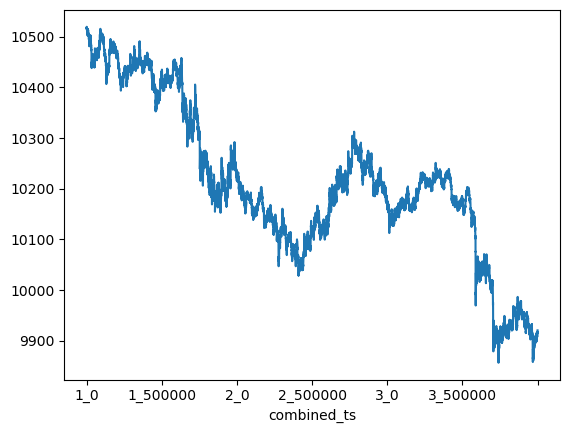

In [6]:
df_by_product['VOLCANIC_ROCK']['mid_price'].plot()

<Axes: xlabel='combined_ts'>

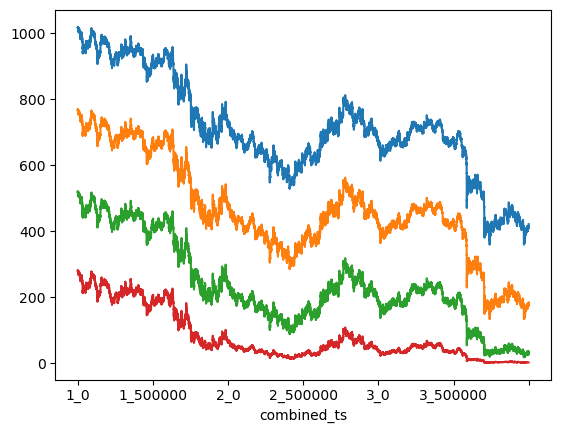

In [7]:
# premium
df_by_product['VOLCANIC_ROCK_VOUCHER_9500']['mid_price'].plot()
df_by_product['VOLCANIC_ROCK_VOUCHER_9750']['mid_price'].plot()
df_by_product['VOLCANIC_ROCK_VOUCHER_10000']['mid_price'].plot()
df_by_product['VOLCANIC_ROCK_VOUCHER_10250']['mid_price'].plot()

In [8]:
df_by_product['VOLCANIC_ROCK']['mid_price'].describe() 

count    30000.000000
mean     10210.920383
std        154.265012
min       9856.500000
25%      10132.500000
50%      10196.500000
75%      10301.500000
max      10519.500000
Name: mid_price, dtype: float64

In [9]:
df_by_product['VOLCANIC_ROCK'].head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
combined_ts,,,,,,,,,,,,,,,,,
1_0,1,0,VOLCANIC_ROCK,10515.0,143.0,10514.0,57.0,NaN,NaN,10517,200,NaN,NaN,NaN,NaN,10516.0,0.0
1_100,1,100,VOLCANIC_ROCK,10514.0,104.0,10513.0,44.0,NaN,NaN,10516,104,10517.0,44.0,NaN,NaN,10515.0,0.0
1_200,1,200,VOLCANIC_ROCK,10514.0,133.0,10513.0,62.0,NaN,NaN,10516,133,10517.0,62.0,NaN,NaN,10515.0,0.0
1_300,1,300,VOLCANIC_ROCK,10516.0,200.0,NaN,NaN,NaN,NaN,10518,149,10519.0,51.0,NaN,NaN,10517.0,0.0
1_400,1,400,VOLCANIC_ROCK,10519.0,108.0,10518.0,63.0,NaN,NaN,10520,103,10521.0,63.0,NaN,NaN,10519.5,0.0


<Axes: xlabel='combined_ts'>

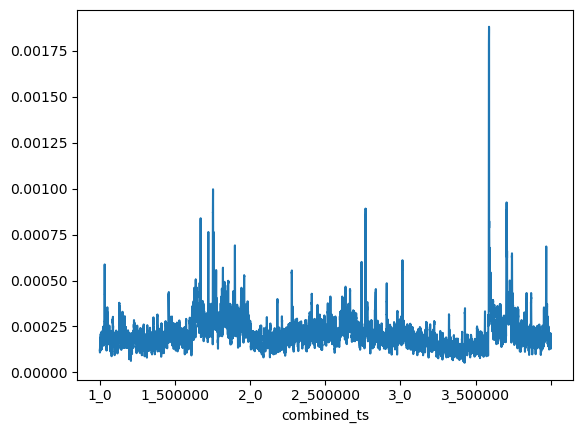

In [10]:
rolling_vol = df_by_product['VOLCANIC_ROCK']['mid_price'].pct_change().rolling(20).std()
rolling_vol.plot()

In [11]:
# df_by_product['VOLCANIC_ROCK_VOUCHER_9500']['bid_price_1'].plot()

In [12]:
df_by_product['SQUID_INK']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
combined_ts,,,,,,,,,,,,,,,,,
1_0,1,0,SQUID_INK,1834.0,23.0,NaN,NaN,NaN,NaN,1838,23,NaN,NaN,NaN,NaN,1836.0,0.0
1_100,1,100,SQUID_INK,1838.0,1.0,1837.0,2.0,1836.0,22.0,1839,22,NaN,NaN,NaN,NaN,1838.5,0.0
1_200,1,200,SQUID_INK,1839.0,22.0,NaN,NaN,NaN,NaN,1842,22,NaN,NaN,NaN,NaN,1840.5,0.0
1_300,1,300,SQUID_INK,1843.0,1.0,1841.0,26.0,NaN,NaN,1844,26,NaN,NaN,NaN,NaN,1843.5,0.0
1_400,1,400,SQUID_INK,1842.0,28.0,NaN,NaN,NaN,NaN,1845,28,NaN,NaN,NaN,NaN,1843.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3_999500,3,999500,SQUID_INK,1928.0,8.0,1927.0,22.0,NaN,NaN,1931,22,NaN,NaN,NaN,NaN,1929.5,0.0
3_999600,3,999600,SQUID_INK,1928.0,29.0,NaN,NaN,NaN,NaN,1931,30,NaN,NaN,NaN,NaN,1929.5,0.0
3_999700,3,999700,SQUID_INK,1927.0,20.0,NaN,NaN,NaN,NaN,1929,6,1930.0,20.0,NaN,NaN,1928.0,0.0


<Axes: xlabel='combined_ts'>

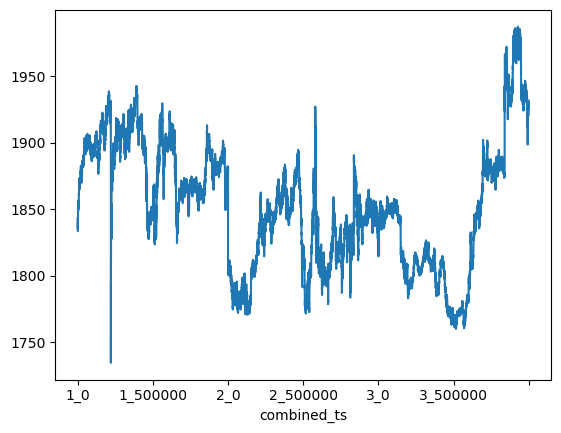

In [13]:
mid_price = df_by_product['SQUID_INK']['mid_price']
z_score = (mid_price - mid_price.rolling(50).mean()) / mid_price.rolling(50).std()

mid_price.plot()

In [14]:
mid_price.mean()

1852.7536166666666

<Axes: xlabel='combined_ts'>

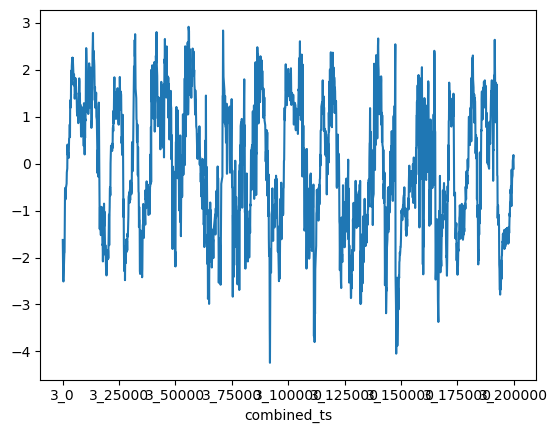

In [15]:
z_score['3_0':'3_200000'].plot()

In [16]:
# price = df_by_product['SQUID_INK']['mid_price']
# SMA_short = price.rolling(window=30).mean()
# SMA_long = price.rolling(window=90).mean()

# plt.figure(figsize=(14, 6))
# plt.plot(price, label='Mid Price')
# plt.plot(SMA_short, label='SMA_short')
# plt.plot(SMA_long, label='SMA_long')
# plt.title('SQUID_INK Mid Price with Moving Averages')
# plt.legend()
# plt.grid(True)
# plt.show()

In [17]:
# underlying = df_by_product['VOLCANIC_ROCK']['mid_price']
# option = df_by_product['VOLCANIC_ROCK_VOUCHER_10500']['mid_price']

# # Combine into a single DataFrame
# df_combined = pd.DataFrame({
#     'underlying': underlying,
#     'option': option
# })

# df_combined['dS'] = df_combined['underlying'].diff()
# df_combined['dO'] = df_combined['option'].diff()

# # Filter rows where dS is not 0 or NaN
# df_combined = df_combined[~((df_combined['dS'] == 0) | (df_combined['dS'].isna()))].copy()

# df_combined['delta'] = df_combined['dO'] / df_combined['dS']
# print(df_combined)

# print(df_combined['delta'].mean())

In [18]:
# Define product names
VR = 'VOLCANIC_ROCK'
options = [
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750',
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Start by creating a combined DataFrame with underlying
df_combined = pd.DataFrame({
    'underlying': df_by_product[VR]['mid_price']
})

# Add each option price to the same DataFrame
for opt in options:
    df_combined[opt] = df_by_product[opt]['mid_price']

df_combined

,underlying,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500
combined_ts,,,,,,
1_0,10516.0,1016.0,766.5,517.5,279.5,95.5
1_100,10515.0,1015.5,765.5,516.5,278.5,94.5
1_200,10515.0,1015.5,765.5,516.5,278.5,94.5
1_300,10517.0,1017.5,767.5,519.5,280.5,95.5
1_400,10519.5,1019.5,770.5,521.5,282.5,97.5
...,...,...,...,...,...,...
3_999500,9916.0,417.5,181.5,34.5,2.5,1.0
3_999600,9917.0,418.5,182.5,30.5,2.5,1.0
3_999700,9917.5,419.5,182.5,34.5,2.5,1.0


In [19]:
# Prepare a dictionary to hold average deltas
avg_deltas = {}

# Loop through each option and calculate delta
for opt in options:
    df_temp = df_combined[['underlying', opt]].copy()
    df_temp['dS'] = df_temp['underlying'].diff()
    df_temp['dO'] = df_temp[opt].diff()
    
    # Filter out where dS is 0 or NaN
    df_temp = df_temp[~((df_temp['dS'] == 0) | (df_temp['dS'].isna()))].copy()
    
    # Calculate delta
    df_temp['delta'] = df_temp['dO'] / df_temp['dS']
    
    # Store the average delta
    avg_deltas[opt] = df_temp['delta'].mean()

# Print average deltas
for opt, delta in avg_deltas.items():
    print(f"{opt} average delta: {delta:.4f}")

VOLCANIC_ROCK_VOUCHER_9500 average delta: 0.9728
VOLCANIC_ROCK_VOUCHER_9750 average delta: 0.9517
VOLCANIC_ROCK_VOUCHER_10000 average delta: 0.7908
VOLCANIC_ROCK_VOUCHER_10250 average delta: 0.4123
VOLCANIC_ROCK_VOUCHER_10500 average delta: 0.1145


<Axes: xlabel='combined_ts'>

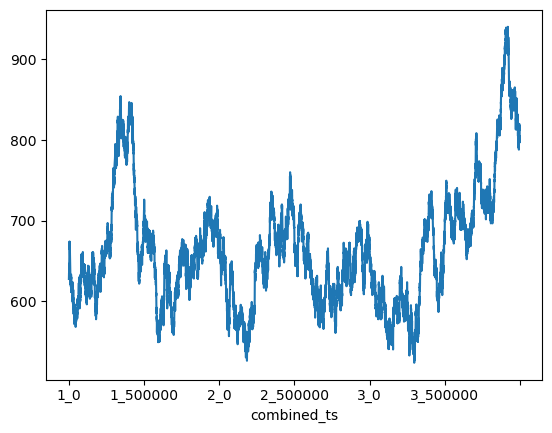

In [20]:
# round 4
mid_price = df_by_product['MAGNIFICENT_MACARONS']['mid_price']
mid_price.plot()

In [21]:
df_by_product['MAGNIFICENT_MACARONS']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
combined_ts,,,,,,,,,,,,,,,,,
1_0,1,0,MAGNIFICENT_MACARONS,624.0,20.0,622.0,12.0,617.0,23.0,631,10,639.0,23.0,644.0,12.0,627.5,0.0
1_100,1,100,MAGNIFICENT_MACARONS,627.0,14.0,625.0,12.0,620.0,21.0,634,7,642.0,21.0,647.0,12.0,630.5,0.0
1_200,1,200,MAGNIFICENT_MACARONS,627.0,10.0,625.0,15.0,620.0,21.0,634,5,642.0,21.0,647.0,15.0,630.5,0.0
1_300,1,300,MAGNIFICENT_MACARONS,629.0,14.0,627.0,14.0,622.0,26.0,636,7,644.0,26.0,649.0,14.0,632.5,0.0
1_400,1,400,MAGNIFICENT_MACARONS,628.0,18.0,625.0,16.0,620.0,26.0,635,9,643.0,26.0,648.0,16.0,631.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3_999500,3,999500,MAGNIFICENT_MACARONS,794.0,12.0,792.0,16.0,786.0,22.0,802,6,811.0,22.0,817.0,16.0,798.0,0.0
3_999600,3,999600,MAGNIFICENT_MACARONS,798.0,10.0,796.0,13.0,790.0,29.0,806,5,815.0,29.0,821.0,13.0,802.0,0.0
3_999700,3,999700,MAGNIFICENT_MACARONS,801.0,20.0,798.0,16.0,792.0,20.0,809,10,817.0,20.0,823.0,16.0,805.0,0.0


In [22]:
factor_day_0 = pd.read_csv('./data/round-4-island-data-bottle/observations_round_4_day_1.csv')
factor_day_1 = pd.read_csv('./data/round-4-island-data-bottle/observations_round_4_day_2.csv')
factor_day_2 = pd.read_csv('./data/round-4-island-data-bottle/observations_round_4_day_3.csv')

factor_day_0['day'] = 1
factor_day_1['day'] = 2
factor_day_2['day'] = 3

factor_df = pd.concat([factor_day_0, factor_day_1, factor_day_2], ignore_index=True)

In [23]:
factor_df['combined_ts'] = factor_df['day'].astype(str) + '_' + factor_df['timestamp'].astype(str)
factor_df.set_index('combined_ts', inplace=True)
factor_df

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,day
combined_ts,,,,,,,,,
1_0,0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00,1
1_100,100,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00,1
1_200,200,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00,1
1_300,300,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01,1
1_400,400,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01,1
...,...,...,...,...,...,...,...,...,...
3_999500,999500,797.5,799.0,1.7,9.5,-5.5,212.124918,54.95,3
3_999600,999600,801.5,803.0,1.7,9.5,-5.5,212.147650,54.96,3
3_999700,999700,804.0,805.5,1.7,9.5,-5.5,212.202086,54.97,3


<Axes: xlabel='combined_ts'>

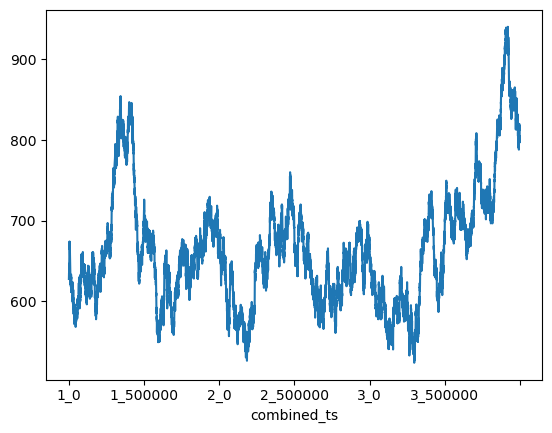

In [24]:
factor_df['mid_price'] = df_by_product['MAGNIFICENT_MACARONS']['mid_price']
factor_df['mid_price'].plot()

In [25]:
px_sunlight_df = factor_df[['mid_price', 'sugarPrice', 'sunlightIndex']]
px_sunlight_corr = px_sunlight_df.corr()
px_sunlight_corr

,mid_price,sugarPrice,sunlightIndex
mid_price,1.000000,0.455956,-0.552071
sugarPrice,0.455956,1.000000,-0.476937
sunlightIndex,-0.552071,-0.476937,1.000000


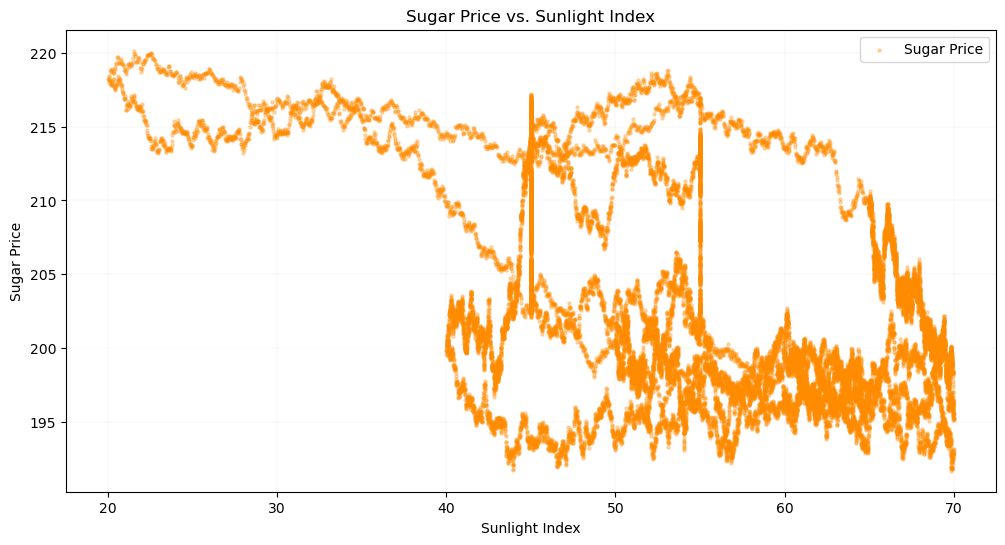

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(
    px_sunlight_df['sunlightIndex'], 
    px_sunlight_df['sugarPrice'], 
    alpha=0.3, s=5, c='darkorange', label='Sugar Price'
)
plt.title('Sugar Price vs. Sunlight Index')
plt.xlabel('Sunlight Index')
plt.ylabel('Sugar Price')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.1)
plt.show()

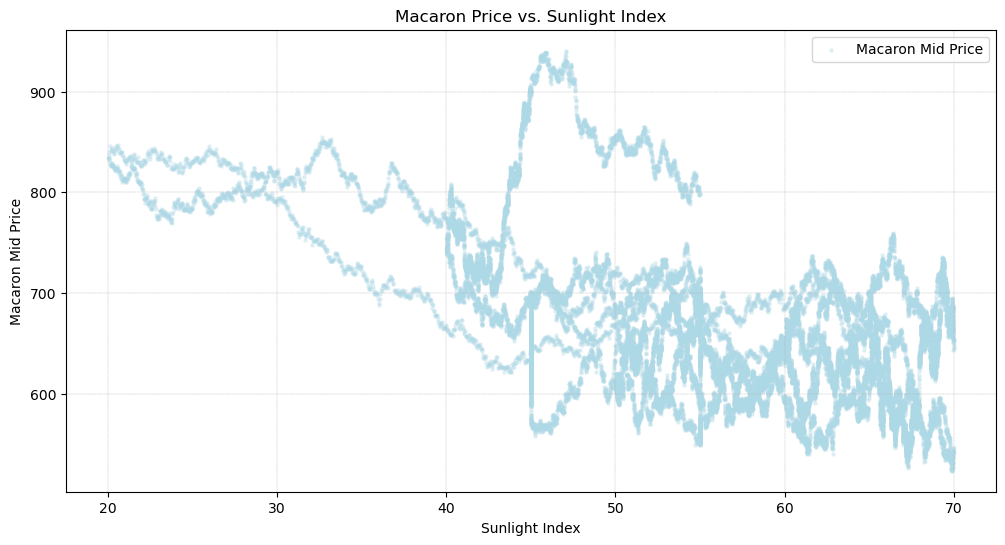

In [27]:
plt.figure(figsize=(12, 6))
plt.scatter(
    px_sunlight_df['sunlightIndex'], 
    px_sunlight_df['mid_price'], 
    alpha=0.3, s=5, c='lightblue', label='Macaron Mid Price'
)
plt.title('Macaron Price vs. Sunlight Index')
plt.xlabel('Sunlight Index')
plt.ylabel('Macaron Mid Price')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.3)
plt.show()

In [28]:
# # find csi
# csi = 60

# below_csi = px_sunlight_df[px_sunlight_df['sunlightIndex'] < csi]
# above_csi = px_sunlight_df[px_sunlight_df['sunlightIndex'] >= csi]

# corr_below = below_csi[['sunlightIndex', 'sugarPrice', 'mid_price']].corr()
# print("Correlation (Below CSI):")
# print(corr_below)

# # Define x and y
# X = below_csi['sunlightIndex']
# y = below_csi['sugarPrice']

# # Add constant for intercept
# X = sm.add_constant(X)

# # Fit linear regression
# model = sm.OLS(y, X).fit()

# # Get the slope's t-value (coefficient for sunlightIndex)
# t_value = model.tvalues['sunlightIndex']
# slope = model.params['sunlightIndex']

# print(f"Slope: {slope:.4f}")
# print(f"T-value: {t_value:.4f}")

# # Define x and y
# X = below_csi['sunlightIndex']
# y = below_csi['mid_price']

# # Add constant for intercept
# X = sm.add_constant(X)

# # Fit linear regression
# model = sm.OLS(y, X).fit()

# # Get the slope's t-value (coefficient for sunlightIndex)
# t_value = model.tvalues['sunlightIndex']
# slope = model.params['sunlightIndex']

# print(f"Slope: {slope:.4f}")
# print(f"T-value: {t_value:.4f}")

In [29]:
results = []

for csi in range(20, 71):  # you can adjust the range
    below = px_sunlight_df[px_sunlight_df['sunlightIndex'] < csi]
    
    if len(below) < 50:  # skip too-small samples
        continue

    # sugar price
    X_sugar = sm.add_constant(below['sunlightIndex'])
    y_sugar = below['sugarPrice']
    model_sugar = sm.OLS(y_sugar, X_sugar).fit()
    slope_sugar = model_sugar.params['sunlightIndex']
    tval_sugar = model_sugar.tvalues['sunlightIndex']
    corr_sugar = below[['sunlightIndex', 'sugarPrice']].corr().iloc[0, 1]

    # macaron mid_price
    X_macaron = sm.add_constant(below['sunlightIndex'])
    y_macaron = below['mid_price']
    model_macaron = sm.OLS(y_macaron, X_macaron).fit()
    slope_macaron = model_macaron.params['sunlightIndex']
    tval_macaron = model_macaron.tvalues['sunlightIndex']
    corr_macaron = below[['sunlightIndex', 'mid_price']].corr().iloc[0, 1]

    results.append({
        'CSI': csi,
        'Slope_Sugar': slope_sugar,
        'T_Sugar': tval_sugar,
        'Corr_Sugar': corr_sugar,
        'Slope_Macaron': slope_macaron,
        'T_Macaron': tval_macaron,
        'Corr_Macaron': corr_macaron,
        'Number_of_Samples': len(below)
    })

# Turn results into DataFrame
results_df = pd.DataFrame(results)

# Show top values with strong negative t-values
results_df.sort_values(by='CSI', inplace=True)

results_df.set_index('CSI', inplace=True)

results_df

,Slope_Sugar,T_Sugar,Corr_Sugar,Slope_Macaron,T_Macaron,Corr_Macaron,Number_of_Samples
CSI,,,,,,,
21,-0.188183,-0.640733,-0.075822,-15.546690,-3.895075,-0.419598,73
22,-0.563045,-3.441316,-0.276554,-7.707093,-5.562546,-0.421766,145
23,-0.945094,-6.838949,-0.421091,-11.063082,-8.721392,-0.509455,219
24,-0.833954,-8.442577,-0.444176,-10.397721,-10.698155,-0.531957,292
25,-0.637058,-8.977099,-0.426713,-7.867030,-10.898817,-0.497055,364
26,-0.442735,-8.144722,-0.363395,-4.922776,-8.529628,-0.378160,438
27,-0.378914,-8.725322,-0.361016,-3.509488,-7.451475,-0.313896,510
28,-0.331308,-9.441948,-0.364462,-2.437016,-6.528331,-0.261213,584
29,-0.296937,-10.485636,-0.379370,-1.916733,-6.370922,-0.241734,656


/var/folders/9_/_hcc1_5d3mbf6gs_r1f4gbsm0000gn/T/ipykernel_9599/2859009502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_grid['CSI'] = results_df.index


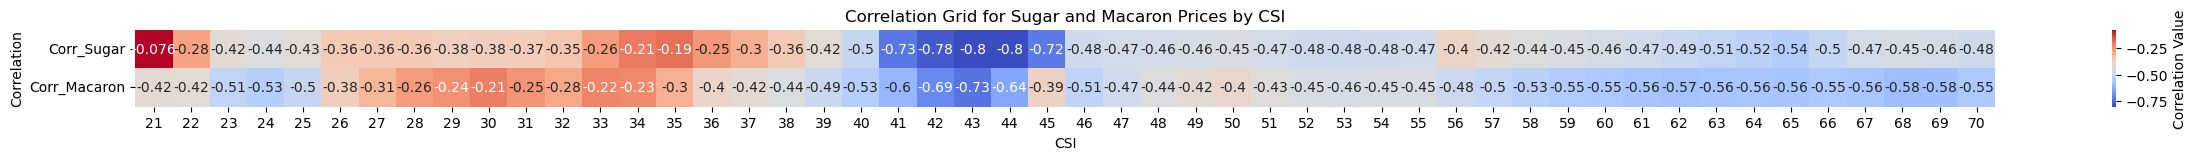

In [30]:
corr_grid = results_df[['Corr_Sugar', 'Corr_Macaron']]

# Set the CSI index as a column to use it for plotting
corr_grid['CSI'] = results_df.index

# Now, we can plot the heatmap
plt.figure(figsize=(30, 1))

# Create the heatmap
sns.heatmap(corr_grid.set_index('CSI').T, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Value'})

# Title and labels
plt.title('Correlation Grid for Sugar and Macaron Prices by CSI')
plt.xlabel('CSI')
plt.ylabel('Correlation')

# Show the plot
plt.show()